
## Import necessary libraries

In [1]:
import torch

# Verifica si CUDA (GPU) está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [2]:
# Python libraries
import datetime as dt
import re
import pickle
from tqdm.notebook import tqdm
import os
import sys
import time
import logging
import random
from collections import defaultdict, Counter

# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')


# Import nltk modules and download dataset
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

# Import Pytorch modules
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler, TensorDataset)
from torch.autograd import Variable
from torch.optim import Adam, AdamW

C:\Users\luisl\AppData\Local\Temp\ipykernel_10892\269888456.py:15: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
import warnings
warnings.filterwarnings("ignore")

## cargar texto resumido 

In [2]:
import pickle

# Define the path to the pickle file (same as before)
ruta_pickle = 'C:/Users/luisl/OneDrive/Escritorio/TFM_IA3/tfm_ia3_nodata/data/preprocessed/text_resumido_v2.pkl'

# Open the file in binary read mode
with open(ruta_pickle, 'rb') as pickle_file:
  # Use pickle.load to deserialize the data and create a new DataFrame
  loaded_df = pickle.load(pickle_file)

print("¡DataFrame cargado del archivo pickle exitosamente!")

¡DataFrame cargado del archivo pickle exitosamente!


C:\Users\luisl\AppData\Local\Temp\ipykernel_17068\3960296817.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  loaded_df = pickle.load(pickle_file)


In [3]:
loaded_df.head()

,type,date,title,speaker,word_count,decision,rate,next_meeting,next_decision,next_rate,text,summary
13691,speech,2023-10-02,Monetary Policy and Financial Stability,Vice Chair for Supervision Michael S. Barr,3267,<NA>,NaN,2023-11-01,0,5.25,Thank you for the opportunity to speak to you....,I am squarely focused on our dual mandate to p...
13692,speech,2023-10-02,Brief Remarks on the Economy and Bank Regulation,Governor Michelle W. Bowman,1996,<NA>,NaN,2023-11-01,0,5.25,Thank you for the invitation to join you today...,Fed Chair Janet Yellen speaks to community ban...
13693,speech,2023-10-04,"The Role of Research, Data, and Analysis in Ba...",Governor Michelle W. Bowman,3757,<NA>,NaN,2023-11-01,0,5.25,It's a pleasure to be back in St. Louis for th...,The annual Community Banking Research Conferen...
13694,speech,2023-10-07,Brief Remarks on the Economy and Insights from...,Governor Michelle W. Bowman,2248,<NA>,NaN,2023-11-01,0,5.25,It is a pleasure to be with you here today.1 A...,"""I would like to share some thoughts about tha..."
13695,speech,2023-10-09,Capital Supports Lending,Vice Chair for Supervision Michael S. Barr,1755,<NA>,NaN,2023-11-01,0,5.25,Thank you for the opportunity to join you toda...,Federal Reserve Chairman Janet Yellen speaks o...


In [14]:
train_data = train_df.to_dict(orient='records')
val_data = test_df.to_dict(orient='records')
data = data.to_dict(orient='records')



In [15]:
train_data

[{'text': 'U.S. budget ran a deficit equal to about 3-1/2 percent of gross domestic product in fiscal 2004. Federal debt held by the public as a percentof GDP has risen noticeably since it bottomed out in 2001. Reinstating a structure like the one provided by the Budget Enforcement Act would signal commitment to fiscal restraint.',
  'label': 2},
 {'text': 'Over 17 percent of subprime adjustable-rate mortgages were in serious delinquency at the end of September, a rate over three times higher than that in mid-2005. Serious delinquencies also increased among near-prime and prime mortgages, although these delinquencies remain much lower than among subprime mortgages. Lenders initiated foreclosure proceedings for an average of 320,000 loans per quarter in the first half of this year.',
  'label': 0},
 {'text': 'The Dodd-Frank Act addresses key gaps in the framework for supervising and regulating systemically important financial institutions. It also addresses the market perception that su

fine tuning del primer modelo

In [17]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from torch.optim import AdamW
from torch.utils.data import DataLoader
import os

# Define labels
labels = ['negative', 'neutral', 'positive']

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model_roberta = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_roberta.to(device)

# Function to preprocess data (replace with your data loading logic)
def preprocess_data(data):
  # Tokenize text and convert labels to tensors
  input_ids = tokenizer(data["text"], return_tensors="pt", padding=True, truncation=True).input_ids.to(device)
  attention_mask = tokenizer(data["text"], return_tensors="pt", padding=True, truncation=True).attention_mask.to(device)
  labels = torch.tensor(data["label"]).to(device)
  return input_ids, attention_mask, labels

from transformers import AutoModelForSequenceClassification
import torch
from tqdm.auto import tqdm
import numpy as pd
from torch.utils.data import DataLoader

# Define training and validation functions
def train(model, optimizer, train_data, epoch, writer):
  model.train()
  losses = []
  accuracies = []
  for data in tqdm(train_data):
    input_ids, attention_mask, labels = preprocess_data(data)
    optimizer.zero_grad()
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    # Calculate accuracy
    predictions = torch.argmax(logits, dim=1)
    correct = (predictions == labels).sum().item()
    accuracy = correct / len(labels)
    accuracies.append(accuracy)
  avg_loss = np.mean(losses)
  avg_accuracy = np.mean(accuracies)
  writer.add_scalar("Train/Loss", avg_loss, epoch)
  writer.add_scalar("Train/Accuracy", avg_accuracy, epoch)
  print(f"Epoch {epoch+1} - Train Loss: {avg_loss:.4f}, Train Accuracy: {avg_accuracy:.4f}")
  return avg_loss, avg_accuracy

def validate(model, val_data, writer, epoch):
  model.eval()
  losses = []
  accuracies = []
  with torch.no_grad():
    for data in val_data:
      input_ids, attention_mask, labels = preprocess_data(data)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask)
      logits = outputs.logits
      loss = torch.nn.functional.cross_entropy(logits, labels)
      losses.append(loss.item())
      # Calculate accuracy
      predictions = torch.argmax(logits, dim=1)
      correct = (predictions == labels).sum().item()
      accuracy = correct / len(labels)
      accuracies.append(accuracy)
  avg_loss = np.mean(losses)
  avg_accuracy = np.mean(accuracies)
  writer.add_scalar("Val/Loss", avg_loss, epoch)
  writer.add_scalar("Val/Accuracy", avg_accuracy, epoch)
  print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_accuracy:.4f}")
  return avg_loss, avg_accuracy

# Hyperparameter tuning (experiment with different learning rates and batch sizes)
learning_rates = [1e-5, 2e-5, 5e-5]
batch_sizes = [16, 32, 64]

# Load your training and validation data (replace with your data)
train_data = train_data  # Load your training data here
val_data = val_data  # Load your validation data here

# Train-validation loop with hyperparameter search
best_val_accuracy = 0
for lr in learning_rates:
  for batch_size in batch_sizes:
    # Define optimizer and data loaders
    optimizer = AdamW(model_roberta.parameters(), lr=lr)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)

    # Early stopping variables
    epochs = 3  # Set the number of epochs
    patience = 2  # Number of epochs to wait for improvement
    no_improvement = 0

    # TensorBoard for visualization (optional)
    from torch.utils.tensorboard import SummaryWriter
    writer = SummaryWriter(f"runs/roberta_sentiment_{lr}_{batch_size}")

    for epoch in range(epochs):
      train_loss, train_acc = train(model_roberta, optimizer, train_loader, epoch, writer)
      val_loss, val_acc = validate(model_roberta, val_loader, writer, epoch)

      # Define a variable for the desired save directory
      save_directory = "C:\\Users\\luisl\\OneDrive\\Escritorio\\TFM_IA3\\tfm_ia3_nodata\\models"  # Ensure double backslashes for Windows paths

      # Early stopping with model saving
      if val_acc > best_val_accuracy:
          best_val_accuracy = val_acc
          no_improvement = 0
          # Save the best model in the specified directory
          torch.save(model_roberta.state_dict(), os.path.join(save_directory, f"best_model_{lr}_{batch_size}_V2.pt"))
          print(f"Saving best model with validation accuracy: {val_acc:.4f}")
      else:
          no_improvement += 1
          if no_improvement >= patience:
              print(f"Early stopping triggered after {no_improvement} epochs without improvement")
              break  # Exit the inner loop for this hyperparameter combination

  0%|          | 0/9 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
C:\Users\luisl\AppData\Local\Temp\ipykernel_10892\3498061804.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(data["label"]).to(device)


Epoch 1 - Train Loss: 1.2998, Train Accuracy: 0.3182
Validation Loss: 1.1954, Validation Accuracy: 0.3611
Saving best model with validation accuracy: 0.3611


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 1.0544, Train Accuracy: 0.4116
Validation Loss: 1.1263, Validation Accuracy: 0.3403


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.9866, Train Accuracy: 0.5082
Validation Loss: 1.1177, Validation Accuracy: 0.3194
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 1.0183, Train Accuracy: 0.4795
Validation Loss: 1.1479, Validation Accuracy: 0.3542


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.8780, Train Accuracy: 0.5835
Validation Loss: 1.1945, Validation Accuracy: 0.3073
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.8252, Train Accuracy: 0.5777
Validation Loss: 1.4669, Validation Accuracy: 0.3714
Saving best model with validation accuracy: 0.3714


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.7774, Train Accuracy: 0.6487
Validation Loss: 1.4161, Validation Accuracy: 0.3429


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.7959, Train Accuracy: 0.6004
Validation Loss: 1.4265, Validation Accuracy: 0.3429
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.7439, Train Accuracy: 0.6338
Validation Loss: 1.2619, Validation Accuracy: 0.4236
Saving best model with validation accuracy: 0.4236


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.5429, Train Accuracy: 0.7816
Validation Loss: 1.5707, Validation Accuracy: 0.3819


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.3568, Train Accuracy: 0.8788
Validation Loss: 1.7058, Validation Accuracy: 0.4653
Saving best model with validation accuracy: 0.4653


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.3057, Train Accuracy: 0.9006
Validation Loss: 1.7992, Validation Accuracy: 0.4010


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.1838, Train Accuracy: 0.9318
Validation Loss: 2.0913, Validation Accuracy: 0.2188
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.2506, Train Accuracy: 0.8916
Validation Loss: 2.0562, Validation Accuracy: 0.4286


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.2268, Train Accuracy: 0.8925
Validation Loss: 2.3756, Validation Accuracy: 0.4286
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.5932, Train Accuracy: 0.7538
Validation Loss: 2.5770, Validation Accuracy: 0.3611


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.6072, Train Accuracy: 0.7790
Validation Loss: 1.7931, Validation Accuracy: 0.3333
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.5341, Train Accuracy: 0.8193
Validation Loss: 2.6057, Validation Accuracy: 0.2500


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.2867, Train Accuracy: 0.9256
Validation Loss: 2.3297, Validation Accuracy: 0.2500
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.3259, Train Accuracy: 0.8613
Validation Loss: 1.9431, Validation Accuracy: 0.5143
Saving best model with validation accuracy: 0.5143


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.1099, Train Accuracy: 0.9489
Validation Loss: 1.9582, Validation Accuracy: 0.5143


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.0620, Train Accuracy: 0.9844
Validation Loss: 2.0828, Validation Accuracy: 0.5429
Saving best model with validation accuracy: 0.5429


carga del primer modelo reentrenado

In [16]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Define labels
labels = ['negative', 'neutral', 'positive']

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Define the path to the saved model (assuming the model is saved in a folder)
model_path = "C:/Users/luisl/OneDrive/Escritorio/TFM_IA3/tfm_ia3_nodata/models/best_model_5e-05_64_V2.pt"  # Replace with your actual path

# Function to preprocess text
def preprocess_text(text, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs.input_ids.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    attention_mask = inputs.attention_mask.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    return input_ids, attention_mask

# Load the model
model_finbert = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model_finbert.load_state_dict(torch.load(model_path))
model_finbert.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))  # Move to GPU if available

with torch.no_grad():
    model_finbert.eval()

    # Example usage
    text = "The stock market is booming!"
    input_ids, attention_mask = preprocess_text(text, tokenizer)

    # Get predictions
    outputs = model_finbert(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

    # Get the predicted sentiment
    predicted_sentiment = labels[predicted_label]

    print(f"Predicted sentiment for '{text}': {predicted_sentiment}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Predicted sentiment for 'The stock market is booming!': positive


twitter-roberta-base-sentiment Model¶


In [17]:
import torch
import numpy as np
import scipy.special
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

# Cargar el tokenizer y el modelo
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model_roberta = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model_roberta.load_state_dict(torch.load(model_path))
model_roberta.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Mover el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_roberta.to(device)

tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}
labels = ['negative', 'neutral', 'positive']

# Asumiendo que X_submuestra es tu lista de textos a analizar
preds_roberta = []
preds_proba_roberta = []

for x in tqdm(X_submuestra, desc="Procesando predicciones"):
    with torch.no_grad():
        # Tokenizar y mover el texto completo a la GPU
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs).to(device)
        # Obtener las logits del modelo
        logits = model_roberta(**input_sequence).logits
        # Aplicar softmax en la GPU
        scores = torch.softmax(logits, dim=1).cpu().numpy().squeeze()
    
    sentimiento_general = labels[np.argmax(scores)]
    probabilidad_general = np.max(scores)
    
    preds_roberta.append(sentimiento_general)
    preds_proba_roberta.append(probabilidad_general)


Procesando predicciones: 100%|██████████| 174/174 [00:05<00:00, 32.92it/s]


In [18]:
submuestra_df['predicted_roberta'] = preds_roberta; submuestra_df

,type,date,title,speaker,word_count,decision,rate,next_meeting,next_decision,next_rate,text,summary,predicted_roberta
22,speech,2023-11-08,Opening Remarks,Chair Jerome H. Powell,760,<NA>,NaN,2023-12-13,0,5.25,"Thank you, Stacey, for the chance to be part o...",The Fed is celebrating the 100th anniversary o...,neutral
125,testimony,2005-07-20,Federal Reserve Board's semiannual Monetary Po...,Alan Greenspan,3253,<NA>,NaN,2005-08-09,1,3.50,"In mid-February,when I presented our last repo...",The economy appeared to be on a solid growth p...,positive
164,testimony,2012-05-17,Settlement practices,"Scott G. Alvarez, General Counsel",1774,<NA>,NaN,2012-06-20,-1,0.00,"Introduction Chairman Bachus, Ranking Me...",The Federal Reserve has supervisory authority ...,negative
9,speech,2023-10-18,The Evolution of the Federal Reserveâs Emplo...,Governor Lisa D. Cook,1592,<NA>,NaN,2023-11-01,0,5.25,"Thank you. I am rarely at a loss for words, as...",Federal Reserve Chair Janet Yellen is given th...,neutral
46,testimony,1997-02-13,Modernization of the financial system,Alan Greenspan,4100,<NA>,NaN,1997-03-25,1,5.50,"Madam Chairwoman, members of the Subcommittee ...",The Federal Reserve Board supports expanded fi...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,speech,2023-10-19,Opening Remarks,Vice Chair Philip N. Jefferson,710,<NA>,NaN,2023-11-01,0,5.25,Our guests include academics from a number of ...,The U.S. Treasury market remains the largest a...,neutral
51,testimony,1997-03-20,Performance of the U.S. economy,Alan Greenspan,2142,<NA>,NaN,1997-03-25,1,5.50,"Mr. Chairman and members of the Committee, I a...","Mr. Chairman, I would like to highlight some o...",neutral
43,testimony,1996-09-18,Implications of trading losses by Sumitomo Corp.,Governor Susan M. Phillips,1283,<NA>,NaN,1996-09-24,0,5.25,Thank you for the opportunity to discuss the r...,Sumitomo's copper trading losses may be as lar...,neutral
14,speech,2023-10-19,Multiple Scenarios in Stress Testing,Vice Chair for Supervision Michael S. Barr,2378,<NA>,NaN,2023-11-01,0,5.25,The stress test as we know it today grew out o...,The Federal Reserve conducts an annual stress ...,neutral


yiyanghkust/finbert-tone Model

In [18]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from torch.optim import AdamW
from torch.utils.data import DataLoader

# Define labels
labels = ['negative', 'neutral', 'positive']

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model_roberta = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_roberta.to(device)

# Function to preprocess data (replace with your data loading logic)
def preprocess_data(data):
  # Tokenize text and convert labels to tensors
  input_ids = tokenizer(data["text"], return_tensors="pt", padding=True, truncation=True).input_ids.to(device)
  attention_mask = tokenizer(data["text"], return_tensors="pt", padding=True, truncation=True).attention_mask.to(device)
  labels = torch.tensor(data["label"]).to(device)
  return input_ids, attention_mask, labels

from transformers import AutoModelForSequenceClassification
import torch
from tqdm.auto import tqdm
import numpy as pd
from torch.utils.data import DataLoader

# Define training and validation functions
def train(model, optimizer, train_data, epoch, writer):
  model.train()
  losses = []
  accuracies = []
  for data in tqdm(train_data):
    input_ids, attention_mask, labels = preprocess_data(data)
    optimizer.zero_grad()
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    # Calculate accuracy
    predictions = torch.argmax(logits, dim=1)
    correct = (predictions == labels).sum().item()
    accuracy = correct / len(labels)
    accuracies.append(accuracy)
  avg_loss = np.mean(losses)
  avg_accuracy = np.mean(accuracies)
  writer.add_scalar("Train/Loss", avg_loss, epoch)
  writer.add_scalar("Train/Accuracy", avg_accuracy, epoch)
  print(f"Epoch {epoch+1} - Train Loss: {avg_loss:.4f}, Train Accuracy: {avg_accuracy:.4f}")
  return avg_loss, avg_accuracy

def validate(model, val_data, writer, epoch):
  model.eval()
  losses = []
  accuracies = []
  with torch.no_grad():
    for data in val_data:
      input_ids, attention_mask, labels = preprocess_data(data)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask)
      logits = outputs.logits
      loss = torch.nn.functional.cross_entropy(logits, labels)
      losses.append(loss.item())
      # Calculate accuracy
      predictions = torch.argmax(logits, dim=1)
      correct = (predictions == labels).sum().item()
      accuracy = correct / len(labels)
      accuracies.append(accuracy)
  avg_loss = np.mean(losses)
  avg_accuracy = np.mean(accuracies)
  writer.add_scalar("Val/Loss", avg_loss, epoch)
  writer.add_scalar("Val/Accuracy", avg_accuracy, epoch)
  print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_accuracy:.4f}")
  return avg_loss, avg_accuracy

# Hyperparameter tuning (experiment with different learning rates and batch sizes)
learning_rates = [1e-5, 2e-5, 5e-5]
batch_sizes = [16, 32, 64]

# Load your training and validation data (replace with your data)
train_data = train_data  # Load your training data here
val_data = val_data  # Load your validation data here

# Train-validation loop with hyperparameter search
best_val_accuracy = 0
for lr in learning_rates:
  for batch_size in batch_sizes:
    # Define optimizer and data loaders
    optimizer = AdamW(model_roberta.parameters(), lr=lr)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)

    # Early stopping variables
    epochs = 3  # Set the number of epochs
    patience = 2  # Number of epochs to wait for improvement
    no_improvement = 0

    # TensorBoard for visualization (optional)
    from torch.utils.tensorboard import SummaryWriter
    writer = SummaryWriter(f"runs/roberta_sentiment_{lr}_{batch_size}")

    for epoch in range(epochs):
      train_loss, train_acc = train(model_roberta, optimizer, train_loader, epoch, writer)
      val_loss, val_acc = validate(model_roberta, val_loader, writer, epoch)

      # Define a variable for the desired save directory
      save_directory = "C:\\Users\\luisl\\OneDrive\\Escritorio\\TFM_IA3\\tfm_ia3_nodata\\models"  # Ensure double backslashes for Windows paths

      # Early stopping with model saving
      if val_acc > best_val_accuracy:
          best_val_accuracy = val_acc
          no_improvement = 0
          # Save the best model in the specified directory
          torch.save(model_roberta.state_dict(), os.path.join(save_directory, f"best_model_2_{lr}_{batch_size}_V2.pt"))
          print(f"Saving best model with validation accuracy: {val_acc:.4f}")
      else:
          no_improvement += 1
          if no_improvement >= patience:
              print(f"Early stopping triggered after {no_improvement} epochs without improvement")
              break  # Exit the inner loop for this hyperparameter combination

  0%|          | 0/9 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
C:\Users\luisl\AppData\Local\Temp\ipykernel_10892\2321675807.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(data["label"]).to(device)


Epoch 1 - Train Loss: 4.5154, Train Accuracy: 0.3081
Validation Loss: 2.7183, Validation Accuracy: 0.4514
Saving best model with validation accuracy: 0.4514


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 1.9676, Train Accuracy: 0.3876
Validation Loss: 1.8457, Validation Accuracy: 0.3611


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 1.1586, Train Accuracy: 0.4710
Validation Loss: 1.6918, Validation Accuracy: 0.3611
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.8629, Train Accuracy: 0.6080
Validation Loss: 1.4716, Validation Accuracy: 0.3698


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.5716, Train Accuracy: 0.7875
Validation Loss: 1.8021, Validation Accuracy: 0.4010
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.5837, Train Accuracy: 0.7633
Validation Loss: 1.2877, Validation Accuracy: 0.4857
Saving best model with validation accuracy: 0.4857


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.4663, Train Accuracy: 0.8655
Validation Loss: 1.3221, Validation Accuracy: 0.4571


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.3071, Train Accuracy: 0.8906
Validation Loss: 1.4701, Validation Accuracy: 0.4571
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.4223, Train Accuracy: 0.8163
Validation Loss: 1.8895, Validation Accuracy: 0.4444


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.1664, Train Accuracy: 0.9514
Validation Loss: 2.2473, Validation Accuracy: 0.4236
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.1079, Train Accuracy: 0.9443
Validation Loss: 2.6508, Validation Accuracy: 0.2500


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.0334, Train Accuracy: 1.0000
Validation Loss: 2.6622, Validation Accuracy: 0.4167
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.0443, Train Accuracy: 0.9948
Validation Loss: 2.3211, Validation Accuracy: 0.5714
Saving best model with validation accuracy: 0.5714


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.0190, Train Accuracy: 0.9948
Validation Loss: 2.2351, Validation Accuracy: 0.5143


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.0202, Train Accuracy: 0.9948
Validation Loss: 2.3643, Validation Accuracy: 0.4857
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.0815, Train Accuracy: 0.9653
Validation Loss: 4.1260, Validation Accuracy: 0.3819


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.2756, Train Accuracy: 0.9274
Validation Loss: 3.3455, Validation Accuracy: 0.2917
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.0124, Train Accuracy: 1.0000
Validation Loss: 4.9242, Validation Accuracy: 0.2500


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.0566, Train Accuracy: 0.9750
Validation Loss: 5.6513, Validation Accuracy: 0.4479
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.0016, Train Accuracy: 1.0000
Validation Loss: 4.8915, Validation Accuracy: 0.4286


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.0195, Train Accuracy: 0.9948
Validation Loss: 3.5892, Validation Accuracy: 0.5429
Early stopping triggered after 2 epochs without improvement


carga de segundo modelo reentrenado

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Define labels
labels = ['negative', 'neutral', 'positive']

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# Define the path to the saved model (assuming the model is saved in a folder)
model_path = "C:/Users/luisl/OneDrive/Escritorio/TFM_IA3/tfm_ia3_nodata/models/best_model_2_2e-05_64_V2.pt"  # Replace with your actual path

# Function to preprocess text
def preprocess_text(text, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs.input_ids.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    attention_mask = inputs.attention_mask.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    return input_ids, attention_mask

# Load the model
model_finbert = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
model_finbert.load_state_dict(torch.load(model_path))
model_finbert.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))  # Move to GPU if available

with torch.no_grad():
    model_finbert.eval()

    # Example usage
    text = "The stock market is doing great!"
    input_ids, attention_mask = preprocess_text(text, tokenizer)

    # Get predictions
    outputs = model_finbert(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

    # Get the predicted sentiment
    predicted_sentiment = labels[predicted_label]

    print(f"Predicted sentiment for '{text}': {predicted_sentiment}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Predicted sentiment for 'The stock market is doing great!': neutral


In [20]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd
from tqdm.auto import tqdm

# Inicialización del modelo y tokenizer
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
finbert = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
finbert.load_state_dict(torch.load(model_path))
finbert.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))  # Move to GPU if available

# Mover el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
finbert.to(device)

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Asumiendo que submuestra_df es tu DataFrame y tiene una columna 'text'
predicted_finbert_tone = []

for text in tqdm(submuestra_df['summary'], desc="Analizando sentimientos"):
    with torch.no_grad():
        # Tokenizar y mover el texto completo a la GPU
        result = nlp(text)[0]
    
    sentimiento_final = result['label'].lower()
    predicted_finbert_tone.append(sentimiento_final)

# Añadir los resultados al DataFrame
submuestra_df['predicted_finbertTone'] = predicted_finbert_tone


Analizando sentimientos:   0%|          | 0/174 [00:00<?, ?it/s]

c:\Users\luisl\anaconda3\envs\tfm_modelado\lib\site-packages\transformers\pipelines\base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


ProsusAI/finbert Model


In [19]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from torch.optim import AdamW
from torch.utils.data import DataLoader

# Define labels
labels = ['negative', 'neutral', 'positive']

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_roberta = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_roberta.to(device)

# Function to preprocess data (replace with your data loading logic)
def preprocess_data(data):
  # Tokenize text and convert labels to tensors
  input_ids = tokenizer(data["text"], return_tensors="pt", padding=True, truncation=True).input_ids.to(device)
  attention_mask = tokenizer(data["text"], return_tensors="pt", padding=True, truncation=True).attention_mask.to(device)
  labels = torch.tensor(data["label"]).to(device)
  return input_ids, attention_mask, labels

from transformers import AutoModelForSequenceClassification
import torch
from tqdm.auto import tqdm
import numpy as pd
from torch.utils.data import DataLoader

# Define training and validation functions
def train(model, optimizer, train_data, epoch, writer):
  model.train()
  losses = []
  accuracies = []
  for data in tqdm(train_data):
    input_ids, attention_mask, labels = preprocess_data(data)
    optimizer.zero_grad()
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    # Calculate accuracy
    predictions = torch.argmax(logits, dim=1)
    correct = (predictions == labels).sum().item()
    accuracy = correct / len(labels)
    accuracies.append(accuracy)
  avg_loss = np.mean(losses)
  avg_accuracy = np.mean(accuracies)
  writer.add_scalar("Train/Loss", avg_loss, epoch)
  writer.add_scalar("Train/Accuracy", avg_accuracy, epoch)
  print(f"Epoch {epoch+1} - Train Loss: {avg_loss:.4f}, Train Accuracy: {avg_accuracy:.4f}")
  return avg_loss, avg_accuracy

def validate(model, val_data, writer, epoch):
  model.eval()
  losses = []
  accuracies = []
  with torch.no_grad():
    for data in val_data:
      input_ids, attention_mask, labels = preprocess_data(data)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask)
      logits = outputs.logits
      loss = torch.nn.functional.cross_entropy(logits, labels)
      losses.append(loss.item())
      # Calculate accuracy
      predictions = torch.argmax(logits, dim=1)
      correct = (predictions == labels).sum().item()
      accuracy = correct / len(labels)
      accuracies.append(accuracy)
  avg_loss = np.mean(losses)
  avg_accuracy = np.mean(accuracies)
  writer.add_scalar("Val/Loss", avg_loss, epoch)
  writer.add_scalar("Val/Accuracy", avg_accuracy, epoch)
  print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_accuracy:.4f}")
  return avg_loss, avg_accuracy

# Hyperparameter tuning (experiment with different learning rates and batch sizes)
learning_rates = [1e-5, 2e-5, 5e-5]
batch_sizes = [16, 32, 64]

# Load your training and validation data (replace with your data)
train_data = train_data  # Load your training data here
val_data = val_data  # Load your validation data here

# Train-validation loop with hyperparameter search
best_val_accuracy = 0
for lr in learning_rates:
  for batch_size in batch_sizes:
    # Define optimizer and data loaders
    optimizer = AdamW(model_roberta.parameters(), lr=lr)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)

    # Early stopping variables
    epochs = 3  # Set the number of epochs
    patience = 2  # Number of epochs to wait for improvement
    no_improvement = 0

    # TensorBoard for visualization (optional)
    from torch.utils.tensorboard import SummaryWriter
    writer = SummaryWriter(f"runs/roberta_sentiment_{lr}_{batch_size}")

    for epoch in range(epochs):
      train_loss, train_acc = train(model_roberta, optimizer, train_loader, epoch, writer)
      val_loss, val_acc = validate(model_roberta, val_loader, writer, epoch)

      # Define a variable for the desired save directory
      save_directory = "C:\\Users\\luisl\\OneDrive\\Escritorio\\TFM_IA3\\tfm_ia3_nodata\\models"  # Ensure double backslashes for Windows paths

      # Early stopping with model saving
      if val_acc > best_val_accuracy:
          best_val_accuracy = val_acc
          no_improvement = 0
          # Save the best model in the specified directory
          torch.save(model_roberta.state_dict(), os.path.join(save_directory, f"best_model_3_{lr}_{batch_size}_V2.pt"))
          print(f"Saving best model with validation accuracy: {val_acc:.4f}")
      else:
          no_improvement += 1
          if no_improvement >= patience:
              print(f"Early stopping triggered after {no_improvement} epochs without improvement")
              break  # Exit the inner loop for this hyperparameter combination

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\luisl\AppData\Local\Temp\ipykernel_10892\2258492466.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(data["label"]).to(device)


Epoch 1 - Train Loss: 1.8500, Train Accuracy: 0.3251
Validation Loss: 1.8939, Validation Accuracy: 0.2292
Saving best model with validation accuracy: 0.2292


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 1.2742, Train Accuracy: 0.4362
Validation Loss: 1.4914, Validation Accuracy: 0.1250


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.9991, Train Accuracy: 0.4874
Validation Loss: 1.3259, Validation Accuracy: 0.2778
Saving best model with validation accuracy: 0.2778


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.9333, Train Accuracy: 0.5466
Validation Loss: 1.3144, Validation Accuracy: 0.2604


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.8064, Train Accuracy: 0.6767
Validation Loss: 1.3467, Validation Accuracy: 0.1094
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.7256, Train Accuracy: 0.6870
Validation Loss: 1.4861, Validation Accuracy: 0.2286


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.5820, Train Accuracy: 0.7727
Validation Loss: 1.6398, Validation Accuracy: 0.2857
Saving best model with validation accuracy: 0.2857


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.4969, Train Accuracy: 0.8187
Validation Loss: 1.6377, Validation Accuracy: 0.2286


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.4400, Train Accuracy: 0.8024
Validation Loss: 1.8574, Validation Accuracy: 0.1875


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.2080, Train Accuracy: 0.9653
Validation Loss: 2.1001, Validation Accuracy: 0.1458
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.1438, Train Accuracy: 0.9574
Validation Loss: 2.3367, Validation Accuracy: 0.0938


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.0830, Train Accuracy: 1.0000
Validation Loss: 2.5008, Validation Accuracy: 0.1562
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.1084, Train Accuracy: 0.9740
Validation Loss: 2.2263, Validation Accuracy: 0.2571


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.1146, Train Accuracy: 0.9844
Validation Loss: 2.2230, Validation Accuracy: 0.2571
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.1176, Train Accuracy: 0.9583
Validation Loss: 3.0867, Validation Accuracy: 0.2778


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.1589, Train Accuracy: 0.9514
Validation Loss: 2.6387, Validation Accuracy: 0.3403
Saving best model with validation accuracy: 0.3403


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.0444, Train Accuracy: 0.9830
Validation Loss: 3.0590, Validation Accuracy: 0.1875


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.0504, Train Accuracy: 0.9938
Validation Loss: 3.3749, Validation Accuracy: 0.1875


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.0199, Train Accuracy: 1.0000
Validation Loss: 3.7699, Validation Accuracy: 0.1562
Early stopping triggered after 2 epochs without improvement


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Train Loss: 0.1669, Train Accuracy: 0.9427
Validation Loss: 2.7645, Validation Accuracy: 0.4857
Saving best model with validation accuracy: 0.4857


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2 - Train Loss: 0.2284, Train Accuracy: 0.9271
Validation Loss: 2.7838, Validation Accuracy: 0.4000


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3 - Train Loss: 0.0077, Train Accuracy: 1.0000
Validation Loss: 2.6771, Validation Accuracy: 0.3714
Early stopping triggered after 2 epochs without improvement


cargar tercer modelo reentrenado

In [21]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Define labels
labels = ['negative', 'neutral', 'positive']

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')

# Define the path to the saved model (assuming the model is saved in a folder)
model_path = "C:/Users/luisl/OneDrive/Escritorio/TFM_IA3/tfm_ia3_nodata/models/best_model_3_5e-05_64_V2.pt"  # Replace with your actual path

# Function to preprocess text
def preprocess_text(text, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs.input_ids.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    attention_mask = inputs.attention_mask.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    return input_ids, attention_mask

# Load the model
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
model_finbert.load_state_dict(torch.load(model_path))
model_finbert.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))  # Move to GPU if available

with torch.no_grad():
    model_finbert.eval()

    # Example usage
    text = "The stock market is doing great!"
    input_ids, attention_mask = preprocess_text(text, tokenizer)

    # Get predictions
    outputs = model_finbert(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

    # Get the predicted sentiment
    predicted_sentiment = labels[predicted_label]

    print(f"Predicted sentiment for '{text}': {predicted_sentiment}")


Predicted sentiment for 'The stock market is doing great!': negative


In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm.auto import tqdm
import numpy as np

# Inicialización del tokenizer y el modelo
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
model_finbert.load_state_dict(torch.load(model_path))
model_finbert.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))  # Move to GPU if available

# Mover el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_finbert.to(device)

preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}

for x in tqdm(X_submuestra, desc="Procesando predicciones FinBERT"):
    with torch.no_grad():
        # Tokenizar y mover el texto completo a la GPU
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs).to(device)
        logits = model_finbert(**input_sequence).logits
        scores = torch.softmax(logits, dim=1).cpu().numpy().squeeze()
        scores_dict = {
            label: score
            for label, score in zip(model_finbert.config.id2label.values(), scores)
        }
        sentimiento = max(scores_dict, key=scores_dict.get)
        probabilidad = max(scores_dict.values())
    
    preds.append(sentimiento)
    preds_proba.append(probabilidad)



Procesando predicciones FinBERT:   0%|          | 0/174 [00:00<?, ?it/s]

In [23]:
submuestra_df['predicted_finbert'] =preds

hacer la columna sentiment en el dataset de entrenamiento teniendo en cuenta las agregaciones de key y cambiar de 1 a positive etc

In [24]:

y = submuestra_df['next_decision'].to_list()
y = [ 'neutral' if value == 0 else 'positive' if value == 1 else 'negative' for value in y ]


In [25]:
submuestra_df.tail()

,type,date,title,speaker,word_count,decision,rate,next_meeting,next_decision,next_rate,text,summary,predicted_roberta,predicted_finbertTone,predicted_finbert
12,speech,2023-10-19,Opening Remarks,Vice Chair Philip N. Jefferson,710,<NA>,NaN,2023-11-01,0,5.25,Our guests include academics from a number of ...,The U.S. Treasury market remains the largest a...,neutral,neutral,positive
51,testimony,1997-03-20,Performance of the U.S. economy,Alan Greenspan,2142,<NA>,NaN,1997-03-25,1,5.50,"Mr. Chairman and members of the Committee, I a...","Mr. Chairman, I would like to highlight some o...",neutral,positive,positive
43,testimony,1996-09-18,Implications of trading losses by Sumitomo Corp.,Governor Susan M. Phillips,1283,<NA>,NaN,1996-09-24,0,5.25,Thank you for the opportunity to discuss the r...,Sumitomo's copper trading losses may be as lar...,neutral,positive,negative
14,speech,2023-10-19,Multiple Scenarios in Stress Testing,Vice Chair for Supervision Michael S. Barr,2378,<NA>,NaN,2023-11-01,0,5.25,The stress test as we know it today grew out o...,The Federal Reserve conducts an annual stress ...,neutral,positive,negative
29,speech,2023-11-16,The 2023 U.S. Treasury Market Conference,Vice Chair for Supervision Michael S. Barr,2176,<NA>,NaN,2023-12-13,0,5.25,The flash rally in the Treasury market in Octo...,The flash rally in the Treasury market in Octo...,neutral,neutral,positive


In [26]:
submuestra_df['text'][0]

'Thank you for the opportunity to speak to you. I would like to talk with you today about the intersection of my two roles at the Federal Reserve as the Vice Chair for Supervision at the Federal Reserve Board and as a member of the Federal Open Market Committee (FOMC).1 In particular, I\'ll focus on the interaction of monetary policy and financial stability policy. I am squarely focused on our dual mandate to promote maximum employment and stable prices for the American people. I strongly agree with the point that Chair Powell has made often, which is that without price stability, the economy does not work for anyone. Price stability is crucial to achieving a sustained period of strong labor market conditions that benefit all. I joined the FOMC last year at a time when the headline CPI inflation was peaking at about 9 percent, and we had begun our policy response. There has been a lot of progress since tightening the stance of policy began last year. In August, the 12-month change in C

## Model evaluation

In [27]:
def evaluate_model_accuracy(model_name, y_pred):
    accuracy = accuracy_score(y, y_pred)
    print(f'Model: {model_name} - Accuracy-Score: {accuracy:.4f}')

In [30]:
evaluate_model_accuracy('ProsusAI/finbert', preds)
evaluate_model_accuracy('cardiffnlp/twitter-roberta-base-sentiment', preds_roberta)
evaluate_model_accuracy('yiyanghkust/finbert-tone', submuestra_df.predicted_finbertTone)

Model: ProsusAI/finbert - Accuracy-Score: 0.0977
Model: cardiffnlp/twitter-roberta-base-sentiment - Accuracy-Score: 0.8908
Model: yiyanghkust/finbert-tone - Accuracy-Score: 0.0517


In [31]:
print(classification_report(y,preds))
print(classification_report(y,preds_roberta))
print(classification_report(y,submuestra_df.predicted_finbertTone))

              precision    recall  f1-score   support

    negative       0.02      0.02      0.02        58
     neutral       0.02      0.02      0.02        58
    positive       0.20      0.26      0.23        58

    accuracy                           0.10       174
   macro avg       0.08      0.10      0.09       174
weighted avg       0.08      0.10      0.09       174

              precision    recall  f1-score   support

    negative       0.98      0.86      0.92        58
     neutral       0.80      0.95      0.87        58
    positive       0.93      0.86      0.89        58

    accuracy                           0.89       174
   macro avg       0.90      0.89      0.89       174
weighted avg       0.90      0.89      0.89       174

              precision    recall  f1-score   support

    negative       0.03      0.03      0.03        58
     neutral       0.08      0.09      0.08        58
    positive       0.04      0.03      0.04        58

    accuracy        

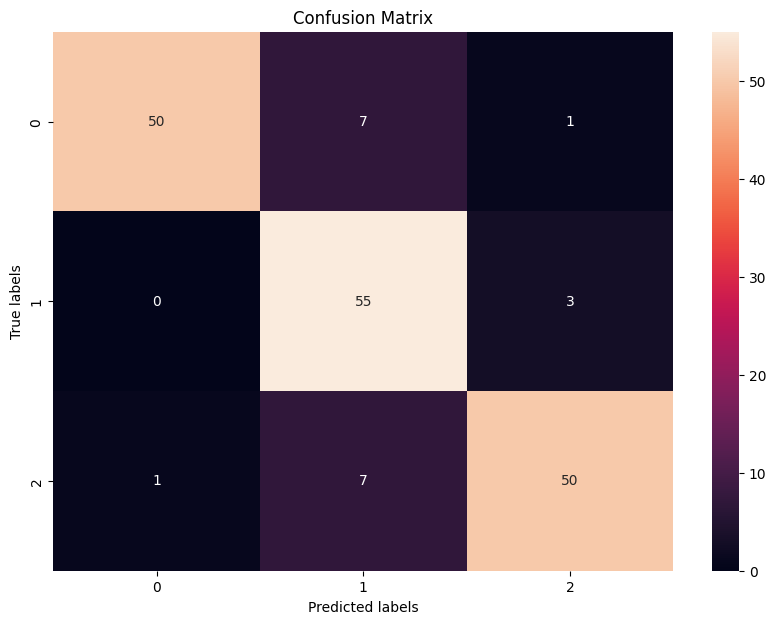

In [32]:
cm = confusion_matrix(y, preds_roberta)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

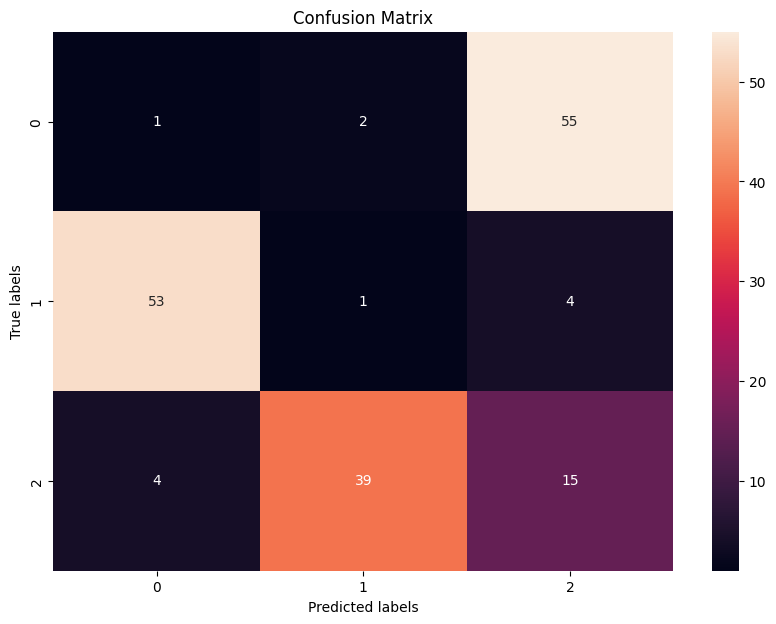

In [33]:
cm = confusion_matrix(y, preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

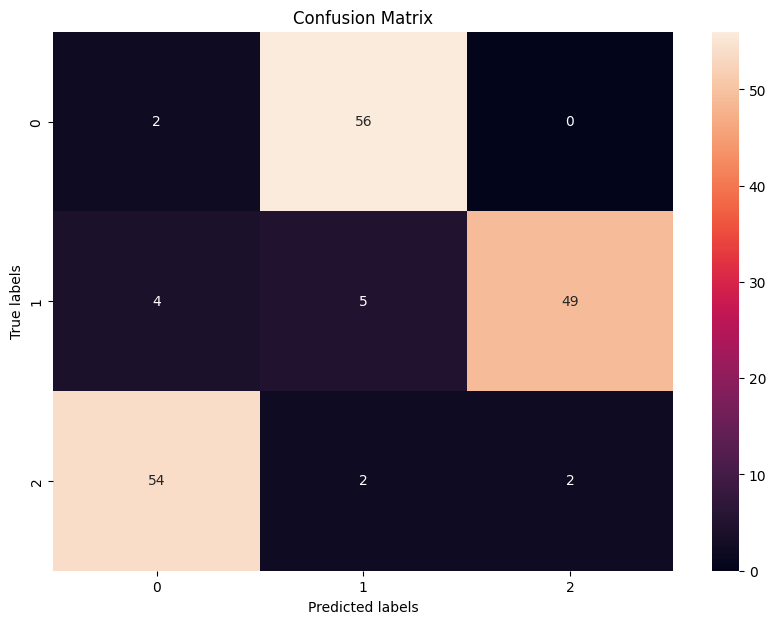

In [34]:
cm = confusion_matrix(y, submuestra_df.predicted_finbertTone)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()